In [1012]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt
import numpy as np

In [1013]:
df = pd.read_csv('./50_Startups.csv')

In [1014]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


### Análise prévia

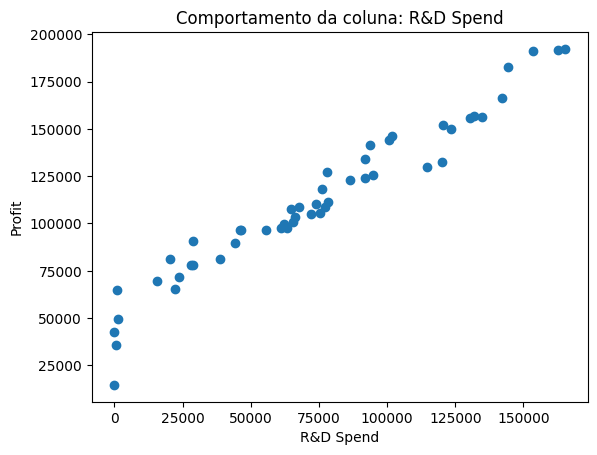

In [1015]:
coluna = 'R&D Spend'
plt.scatter(df[coluna], df['Profit'])
plt.xlabel(coluna)
plt.ylabel('Profit')
plt.title(f'Comportamento da coluna: {coluna}')
plt.show()

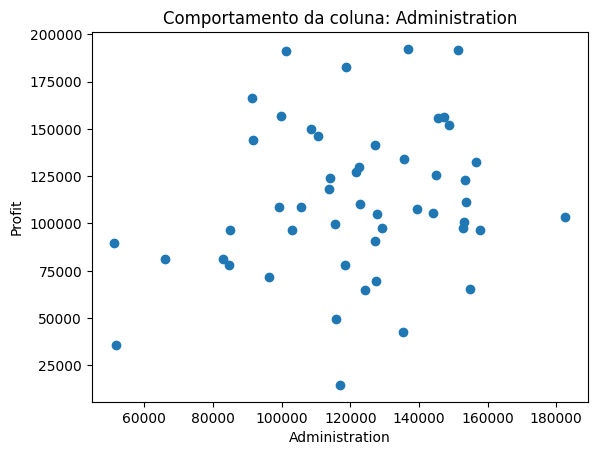

In [1016]:
coluna = 'Administration'
plt.scatter(df[coluna], df['Profit'])
plt.xlabel(coluna)
plt.ylabel('Profit')
plt.title(f'Comportamento da coluna: {coluna}')
plt.show()

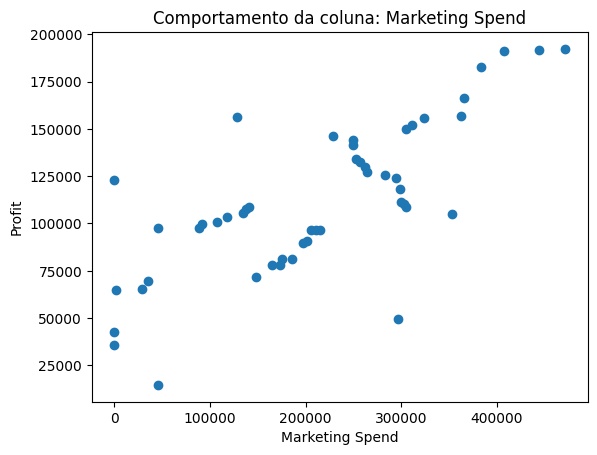

In [1017]:
coluna = 'Marketing Spend'
plt.scatter(df[coluna], df['Profit'])
plt.xlabel(coluna)
plt.ylabel('Profit')
plt.title(f'Comportamento da coluna: {coluna}')
plt.show()

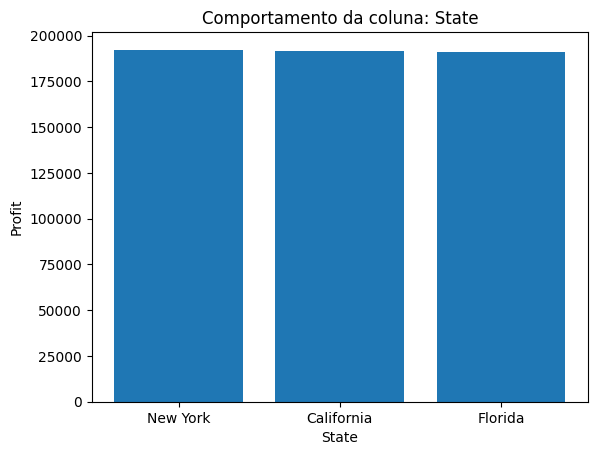

In [1018]:
coluna = 'State'
plt.bar(df[coluna], df['Profit'])
plt.xlabel(coluna)
plt.ylabel('Profit')
plt.title(f'Comportamento da coluna: {coluna}')
plt.show()

### Encoder

In [1019]:
encoder = LabelEncoder()
df['categorized_state'] = encoder.fit_transform(df['State'])
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,categorized_state
0,165349.20,136897.80,471784.10,New York,192261.83,2
1,162597.70,151377.59,443898.53,California,191792.06,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1
3,144372.41,118671.85,383199.62,New York,182901.99,2
4,142107.34,91391.77,366168.42,Florida,166187.94,1


### Reordering

In [1020]:
# reordenar colunas
columns_titles = [
    'R&D Spend', 
    'Administration', 
    'Marketing Spend', 
    'categorized_state', 
    'Profit'
    ]
df = df.reindex(columns=columns_titles)

### Split

In [1021]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [1022]:
x_train, x_test, y_train, y_test = train_test_split(x,
y, test_size = 0.2, random_state = 0)

### Lasso regression

In [1023]:
# Criar um modelo de Lasso Regression
lasso_model = LassoCV(cv=5)

# Ajustar o modelo aos dados de treinamento
lasso_model.fit(x_train, y_train)

# Coeficientes dos recursos
coefficients = lasso_model.coef_

# Identificar recursos com coeficientes não nulos
selected_features_indices = np.where(coefficients > 0.5)[0]

# Selecionar apenas as características selecionadas
selected_features = x_train[:, selected_features_indices]

# Subconjunto dos dados de treinamento e teste usando apenas as características selecionadas
x_train = x_train[:, selected_features_indices]
x_test = x_test[:, selected_features_indices]

In [1024]:
column_names = [
    'R&D Spend', 
    'Administration', 
    'Marketing Spend',
    'categorized_state'
]

# Visualizar os coeficientes com os nomes das colunas
plt.figure(figsize=(10, 6))
plt.bar(column_names, coefficients)
plt.xticks(rotation=90)  # Rotacionar os nomes das colunas para melhor legibilidade
plt.xlabel('Nome da Coluna')
plt.ylabel('Coeficiente Lasso')
plt.title('Coeficientes atribuídos pelo Lasso para cada coluna')
plt.show()

### Training

In [1025]:
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x_train)
regressor = LinearRegression()
regressor.fit(x_poly, y_train)
y_pred = regressor.predict(poly_reg.transform(x_test))

### R2 Score

In [1026]:
r2 = r2_score(y_test, y_pred)
r2

-15.158118376926385

### resultados

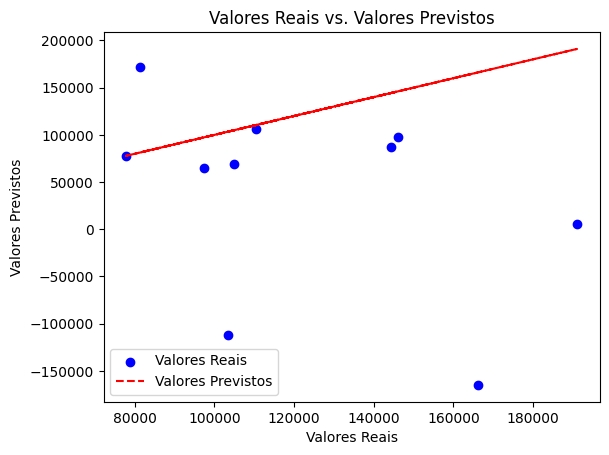

In [1027]:
plt.scatter(y_test, y_pred, color='blue', label='Valores Reais')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Valores Previstos')
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Valores Reais vs. Valores Previstos")
plt.legend()
plt.show()